============================================================================================

# RandomForest

============================================================================================


In [1]:
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
import pandas as pd
import numpy as np
import os
import re
import random
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
from sklearn.decomposition import PCA

import fns_models as fns


% matplotlib inline

from subprocess import check_output
print(check_output(["ls", "data"]).decode("utf-8"))

athenaeum_authors_preview.csv
athenaeum_painting_filtered.csv
athenaeum_paintings.csv
athenaeum_paintings_sizes.csv
color_histograms.csv
complete_data.csv
images
images_athenaeum
images_sizes_2325.csv
net_predicted.csv
painter_info_clean.csv
painting_info_clean.csv
resized_200
test_author200.csv
test_data.csv
test_hist_author_knn.csv
test_hist_author_rf.csv
train_author200.csv
train_data.csv
train_hist_author_knn.csv
train_hist_author_rf.csv



In [19]:
# Get Data 
train, train_labels, test, test_labels = fns.get_top_author(3)
X = train
Y = train_labels

[INFO] The size of train histogram for Random Forest(49890, 34)
[INFO] The size of test histogram for Random Forest(12473, 34)
24      1369
1793    1338
368     1335
Name: author_id, dtype: int64
[trian above] ==================================================[test below]
24      342
1793    335
368     334
Name: author_id, dtype: int64
(4042,)
(4042, 34)


In [37]:
train = train.sample(20)
X = train.sample(20)
Y = train_labels.sample(20)
test = test.sample(15)
test_labels = test_labels.sample(15)

================================================================================================================

# Naive Bayes

[bayesian-optimization](https://github.com/fmfn/BayesianOptimization/blob/master/bayes_opt/bayesian_optimization.py)

================================================================================================================

In [26]:
nb_clf = GaussianNB()
nb_clf.fit(X, Y)

# accuracy of trianing dataset
print "Accuracy of best Extra Tree model on train: %s" % str(nb_clf.score(train, train_labels))

# accuracy of testing dataset
print "Accuracy of best Extra Tree model on test: %s" % str(nb_clf.score(test, test_labels))


Accuracy of best Extra Tree model on train: 0.319396338446
Accuracy of best Extra Tree model on test: 0.2


In [27]:
nbc_true, nbc_pred = test_labels, nb_clf.predict(test)
nbc_pred


array([ 368,  368,  368,   24,  368,  368,   24, 1793,   24,  368,  368,
        368,  368,  368,   24])

In [28]:
test_data_df = fns.result_table(nbc_true, nbc_pred)
test_data_df

,actual,predictions,results
1013,24,368,False
1660,1793,368,False
1637,1793,368,False
1476,368,24,False
882,24,368,False
1747,1793,368,False
1373,368,24,False
1742,1793,1793,True
993,24,24,True
1064,24,368,False


================================================================================================================

# Naive Bayes + PCA

[bayesian-optimization](https://github.com/fmfn/BayesianOptimization/blob/master/bayes_opt/bayesian_optimization.py)

================================================================================================================

In [38]:
## Get 15 principal components
pca = PCA(n_components=15)
pca.fit(train)
pca_transformed = pca.transform(train)
pca_transformed_test = pca.transform(test)

0.99890083670658636

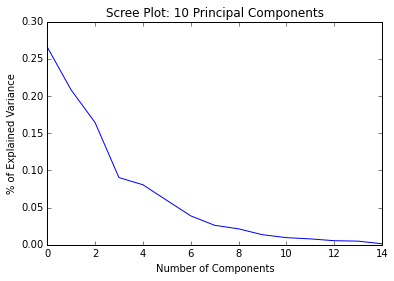

In [39]:
plt.plot(pca.explained_variance_ratio_)
plt.title("Scree Plot: 10 Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("% of Explained Variance")
sum(pca.explained_variance_ratio_)

In [41]:
nb_pca_clf = GaussianNB()
nb_pca_clf.fit(pca_transformed, Y)

# accuracy of trianing dataset
print "Accuracy of best Extra Tree model on train: %s" % str(nb_pca_clf.score(pca_transformed, train_labels))

# accuracy of testing dataset
print "Accuracy of best Extra Tree model on test: %s" % str(nb_pca_clf.score(pca_transformed_test, test_labels))


ValueError: Found input variables with inconsistent numbers of samples: [4042, 20]

In [ ]:
nbc_pca_true, nbc_pca_pred = test_labels, nb_pca_clf.predict(test)
nbc_pca_pred

In [ ]:
test_data_df = fns.result_table(nbc_pca_true, nbc_pca_pred)
test_data_df